In [1]:
import tensorflow as tf

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [2]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    vertical_flip=False,
    horizontal_flip=False
)

In [3]:
train = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_train',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

valid = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_valid',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train, verbose=1, epochs=20, validation_data=valid)

Epoch 1/20
313/313 [==============================] - 26s 45ms/step - loss: 197.3735 - accuracy: 0.1956 - val_loss: 134.0098 - val_accuracy: 0.3070
Epoch 2/20
313/313 [==============================] - 14s 44ms/step - loss: 111.1595 - accuracy: 0.3328 - val_loss: 80.3694 - val_accuracy: 0.3455
Epoch 3/20
313/313 [==============================] - 14s 45ms/step - loss: 67.0941 - accuracy: 0.3942 - val_loss: 45.8857 - val_accuracy: 0.3885
Epoch 4/20
313/313 [==============================] - 14s 45ms/step - loss: 38.3741 - accuracy: 0.4021 - val_loss: 30.4951 - val_accuracy: 0.3880
Epoch 5/20
313/313 [==============================] - 14s 45ms/step - loss: 27.1044 - accuracy: 0.3925 - val_loss: 22.8373 - val_accuracy: 0.3910
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 23.7228 - accuracy: 0.3948 - val_loss: 26.1580 - val_accuracy: 0.4105
Epoch 7/20
313/313 [==============================] - 14s 45ms/step - loss: 21.6562 - accuracy: 0.4178 - val_loss: 26.494

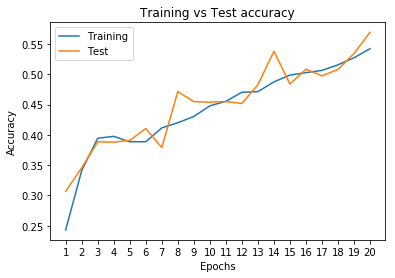

In [8]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(range(1, 21), train_acc)
plt.plot(range(1, 21), val_acc)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Test'])
plt.title('Training vs Test accuracy')
plt.show()

In [9]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}